In [1]:
import math
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
plt.style.use('bmh')

In [2]:
ggrm = pd.read_csv('GGRM10years.JK.csv')
ggrm.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2009-01-05,4425.0,4500.0,4375.0,4425.0,3334.110352,4.0
1,2009-01-06,4425.0,4500.0,4375.0,4425.0,3334.110352,481500.0
2,2009-01-07,4575.0,4675.0,4425.0,4575.0,3447.130859,4.0
3,2009-01-08,4600.0,4600.0,4475.0,4600.0,3465.968018,4.0
4,2009-01-09,4600.0,4900.0,4600.0,4875.0,3673.172607,787000.0


In [3]:
ggrm.shape

(2734, 7)

In [4]:
ggrm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2734 entries, 0 to 2733
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2734 non-null   object 
 1   Open       2732 non-null   float64
 2   High       2732 non-null   float64
 3   Low        2732 non-null   float64
 4   Close      2732 non-null   float64
 5   Adj Close  2732 non-null   float64
 6   Volume     2732 non-null   float64
dtypes: float64(6), object(1)
memory usage: 149.6+ KB


In [5]:
ggrm = ggrm.dropna()

In [6]:
ggrm.reset_index(drop=True)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2009-01-05,4425.0,4500.0,4375.0,4425.0,3334.110352,4.0
1,2009-01-06,4425.0,4500.0,4375.0,4425.0,3334.110352,481500.0
2,2009-01-07,4575.0,4675.0,4425.0,4575.0,3447.130859,4.0
3,2009-01-08,4600.0,4600.0,4475.0,4600.0,3465.968018,4.0
4,2009-01-09,4600.0,4900.0,4600.0,4875.0,3673.172607,787000.0
...,...,...,...,...,...,...,...
2727,2019-12-20,52050.0,53100.0,52000.0,53100.0,53100.000000,1583600.0
2728,2019-12-23,53100.0,53775.0,52525.0,53575.0,53575.000000,1431600.0
2729,2019-12-26,53525.0,53975.0,53275.0,53400.0,53400.000000,645400.0
2730,2019-12-27,53400.0,53900.0,53075.0,53250.0,53250.000000,582400.0


In [7]:
ggrm.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2732.000000,2732.000000,2732.000000,2732.000000,2732.000000,2.732000e+03
mean,53123.316252,53773.435212,52456.982064,53114.321010,46644.710193,1.003658e+06
std,19190.967727,19366.177030,19003.229769,19173.231481,19241.437079,9.366958e+05
min,4425.000000,4500.000000,4375.000000,4425.000000,3334.110352,0.000000e+00
25%,43750.000000,44437.500000,43087.500000,43650.000000,36300.865235,4.790750e+05
50%,54150.000000,54800.000000,53500.000000,54150.000000,45976.203125,8.317500e+05
75%,66500.000000,67375.000000,65756.250000,66556.250000,59988.069336,1.341250e+06
max,94300.000000,100975.000000,92600.000000,94400.000000,91262.382813,1.706350e+07


(array([137., 111.,  94., 204., 432., 664., 442., 332., 300.,  16.]),
 array([ 4425. , 13422.5, 22420. , 31417.5, 40415. , 49412.5, 58410. ,
        67407.5, 76405. , 85402.5, 94400. ]),
 <a list of 10 Patch objects>)

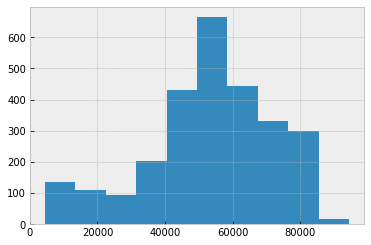

In [8]:
plt.hist(ggrm['Close'])

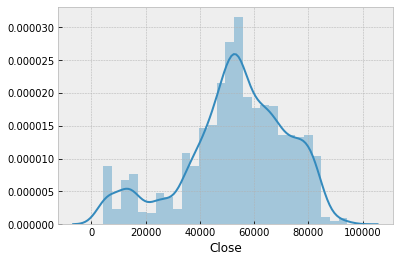

In [9]:
sns.distplot(ggrm['Close'])

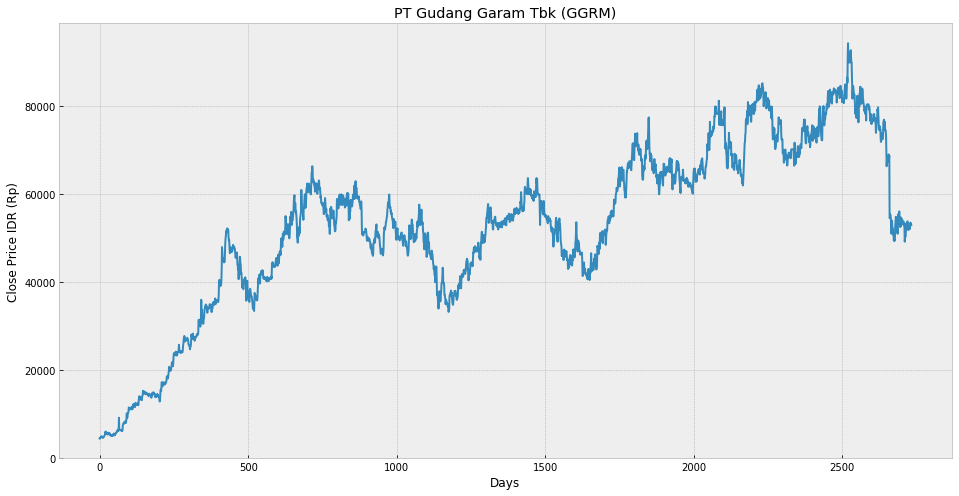

In [10]:
plt.figure(figsize=(16,8))
plt.title('PT Gudang Garam Tbk (GGRM)')
plt.xlabel('Days')
plt.ylabel('Close Price IDR (Rp)')
plt.plot(ggrm['Close'])
plt.show()

In [11]:
ggrm = ggrm[['Close']]
ggrm.head()

,Close
0,4425.0
1,4425.0
2,4575.0
3,4600.0
4,4875.0


In [12]:
future_days = 365
ggrm['Prediction'] = ggrm[['Close']].shift(-future_days)
ggrm.head()

,Close,Prediction
0,4425.0,34200.0
1,4425.0,33950.0
2,4575.0,34000.0
3,4600.0,34100.0
4,4875.0,34950.0


In [13]:
X = np.array(ggrm.drop(['Prediction'], 1))[:-future_days]
print(X)

[[ 4425.]
 [ 4425.]
 [ 4575.]
 ...
 [75150.]
 [75000.]
 [74650.]]


In [14]:
y = np.array(ggrm['Prediction'])[:-future_days]
print(y)

[34200. 33950. 34000. ... 53400. 53250. 53000.]


In [15]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [16]:
tree = DecisionTreeRegressor().fit(x_train, y_train)
lr = LinearRegression().fit(x_train, y_train)

In [17]:
x_future = ggrm.drop(['Prediction'], 1)[:-future_days]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)
x_future

array([[65850.],
       [64475.],
       [63400.],
       [62850.],
       [62825.],
       [63625.],
       [63500.],
       [63000.],
       [64475.],
       [64450.],
       [65050.],
       [65250.],
       [65450.],
       [65800.],
       [65425.],
       [65450.],
       [64925.],
       [64500.],
       [65500.],
       [66700.],
       [65525.],
       [66700.],
       [67700.],
       [67700.],
       [68000.],
       [68200.],
       [67000.],
       [65450.],
       [64950.],
       [64675.],
       [64600.],
       [64900.],
       [64900.],
       [63575.],
       [64200.],
       [64500.],
       [65950.],
       [66400.],
       [66400.],
       [67150.],
       [67800.],
       [68000.],
       [71400.],
       [70000.],
       [71200.],
       [70975.],
       [73900.],
       [73600.],
       [70500.],
       [70100.],
       [72025.],
       [76500.],
       [74250.],
       [73100.],
       [73600.],
       [74275.],
       [73400.],
       [73500.],
       [73950.

In [18]:
tree_prediction = tree.predict(x_future)
print(tree_prediction)
print()
lr_prediction = lr.predict(x_future)
print(lr_prediction)

[75608.33333333 83162.5        73891.66666667 56500.
 76000.         77000.         75000.         65658.33333333
 83162.5        79550.         71600.         73400.
 74331.25       79366.66666667 75525.         74331.25
 77658.33333333 72833.33333333 69508.33333333 75933.33333333
 73000.         75933.33333333 71812.5        71812.5
 74891.66666667 73375.         73950.         74331.25
 77658.33333333 80900.         75725.         76656.25
 76656.25       74500.         85916.66666667 72833.33333333
 72800.         66816.66666667 66816.66666667 77850.
 67662.5        74891.66666667 74300.         63627.77777778
 69887.5        62575.         73362.5        77781.25
 79675.         74725.         77762.5        81312.5
 76000.         77950.         77781.25       78475.
 77262.5        78000.         77466.66666667 77466.66666667
 62987.5        73200.         62987.5        77075.
 72537.5        77075.         79900.         80025.
 78525.         77475.         78525.         757

D:\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


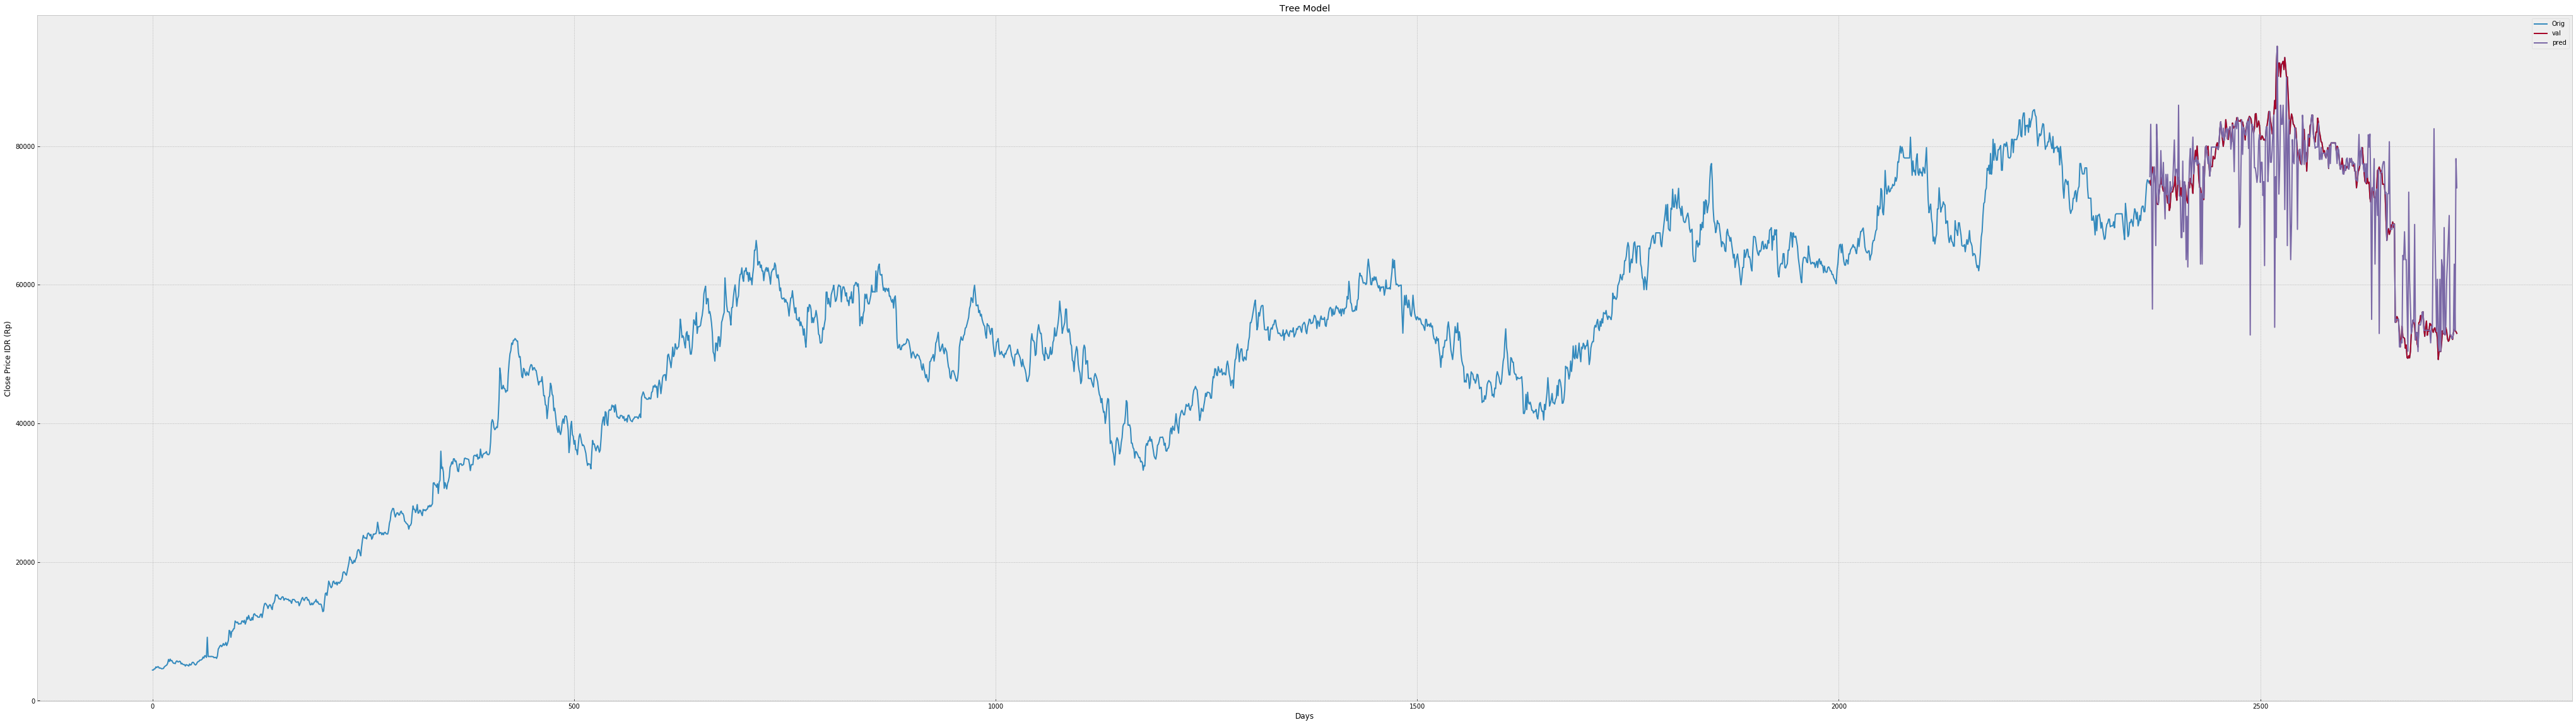

In [19]:
predictions = tree_prediction

valid = ggrm[X.shape[0]:]
valid['Prediction'] = predictions
plt.figure(figsize=(72,20))
plt.title('Tree Model')
plt.xlabel('Days')
plt.ylabel('Close Price IDR (Rp)')
plt.plot(ggrm['Close'])
plt.plot(valid[['Close','Prediction']])
plt.legend(['Orig','val','pred'])
plt.show()

D:\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


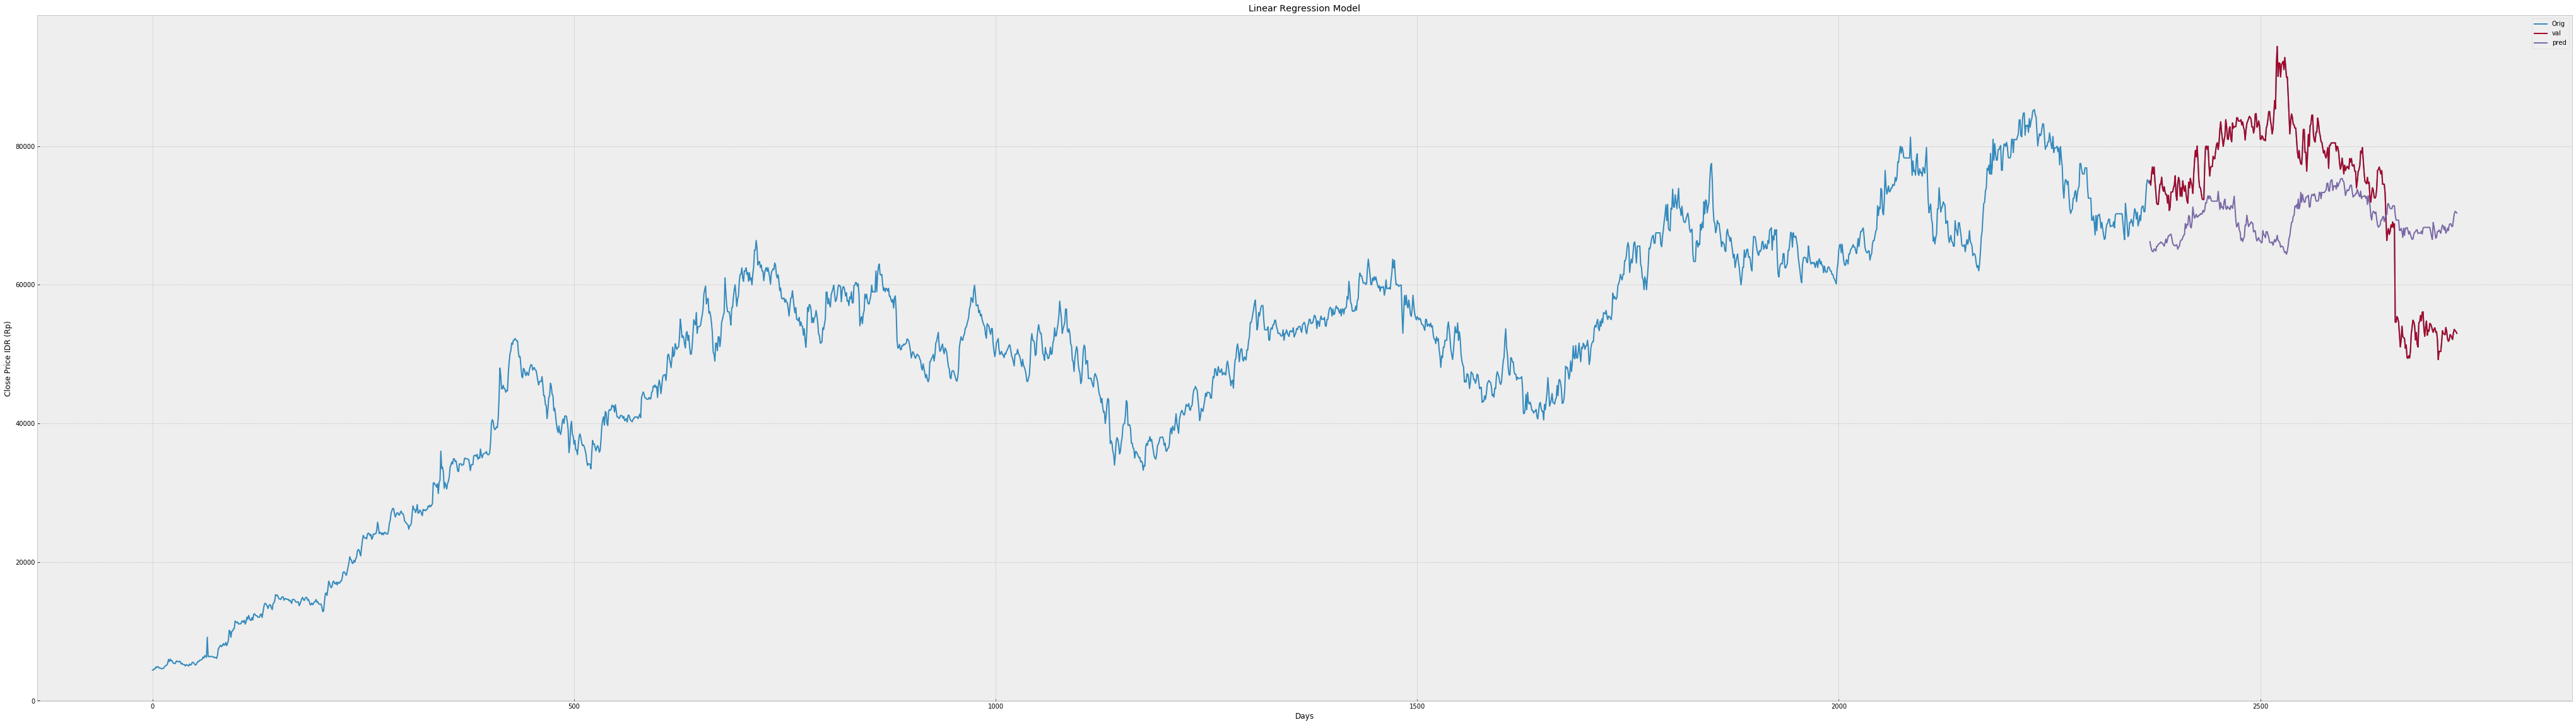

In [20]:
predictions1 = lr_prediction

valid = ggrm[X.shape[0]:]
valid['Prediction'] = predictions1
plt.figure(figsize=(72,20))
plt.title('Linear Regression Model')
plt.xlabel('Days')
plt.ylabel('Close Price IDR (Rp)')
plt.plot(ggrm['Close'])
plt.plot(valid[['Close','Prediction']])
plt.legend(['Orig','val','pred'])
plt.show()

In [21]:
ggrm2019 = pd.read_csv('GGRM2019.JK.csv')

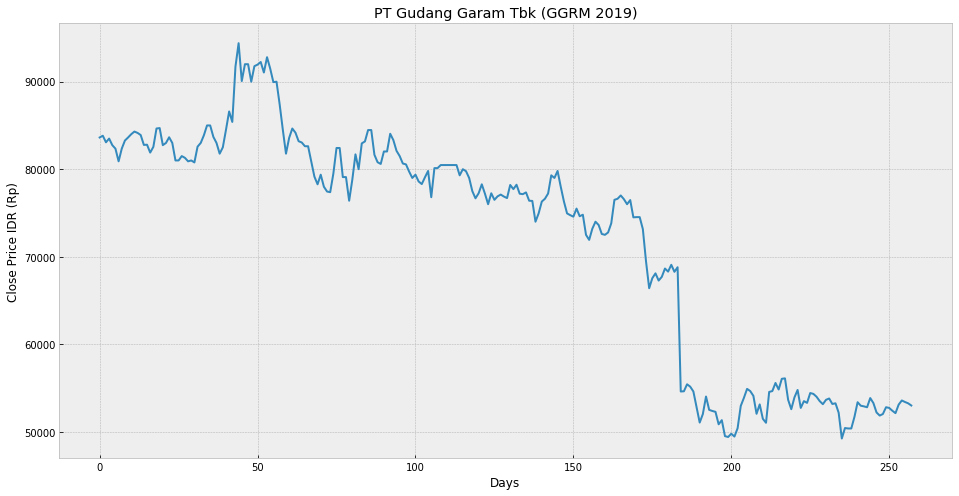

In [22]:
plt.figure(figsize=(16,8))
plt.title('PT Gudang Garam Tbk (GGRM 2019)')
plt.xlabel('Days')
plt.ylabel('Close Price IDR (Rp)')
plt.plot(ggrm2019['Close'])
plt.show()

In [23]:
ggrm2020 = pd.read_csv('GGRM2020.JK.csv')

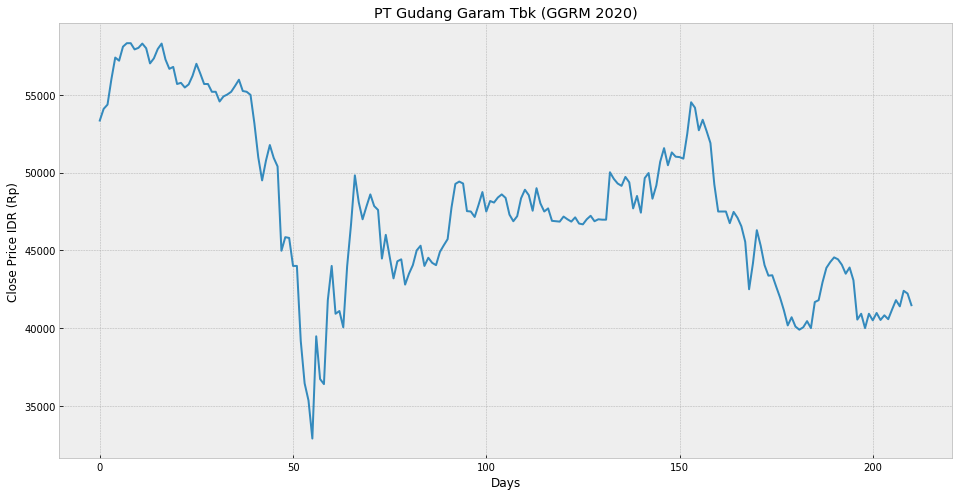

In [24]:
plt.figure(figsize=(16,8))
plt.title('PT Gudang Garam Tbk (GGRM 2020)')
plt.xlabel('Days')
plt.ylabel('Close Price IDR (Rp)')
plt.plot(ggrm2020['Close'])
plt.show()